In [2]:
import pandas as pd
import numpy as np

In [60]:
cust_data=pd.read_csv("C:\\Users\\d\\OneDrive\\Desktop\\Python Study Material\\Case studies\\case study 3\\cust_demographics.csv")
claim_data=pd.read_csv("C:\\Users\\d\\OneDrive\\Desktop\\Python Study Material\\Case studies\\case study 3\\claims.csv")

In [61]:
final_data=pd.merge(left=cust_data,right=claim_data,left_on='CUST_ID',right_on='customer_id',how='outer')

In [10]:
final_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [149]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   customer_id          1100 non-null   float64
 8   incident_cause       1100 non-null   object 
 9   claim_date           1100 non-null   object 
 10  claim_area           1100 non-null   object 
 11  police_report        1100 non-null   object 
 12  claim_type           1100 non-null   object 
 13  claim_amount         1035 non-null   object 
 14  total_policy_claims  1090 non-null   float64
 15  fraudulent           1100 non-null   o

In [64]:
final_data['DateOfBirth']=pd.to_datetime(final_data.DateOfBirth,format='%d-%b-%y')
final_data['claim_date']=pd.to_datetime(final_data.claim_date,format='%m/%d/%Y')
final_data['claim_amount']=final_data.claim_amount.str.replace('$','').astype('float')

C:\Users\d\AppData\Local\Temp\ipykernel_25764\4102113427.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_data['claim_amount']=final_data.claim_amount.str.replace('$','').astype('float')


In [173]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gender               1086 non-null   object        
 1   DateOfBirth          1086 non-null   datetime64[ns]
 2   State                1086 non-null   object        
 3   Contact              1086 non-null   object        
 4   Segment              1086 non-null   object        
 5   claim_id             1100 non-null   float64       
 6   customer_id          1100 non-null   float64       
 7   incident_cause       1100 non-null   object        
 8   claim_date           1086 non-null   datetime64[ns]
 9   claim_area           1100 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1100 non-null   object        
 12  claim_amount         1035 non-null   float64       
 13  total_policy_claims  1090 non-nul

In [62]:
final_data.dropna(axis=0,how='all')

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,97727122.0,35951012.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaN,NaN,NaN,NaN,10247193.0,14818669.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaN,NaN,NaN,NaN,79807493.0,85322831.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaN,NaN,NaN,NaN,69299345.0,73449366.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [7]:
final_data.drop(columns='CUST_ID' ,inplace=True)

In [93]:
final_data.claim_amount     ### It is without $ symbol only

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1102     3059.0
1103     1520.0
1104    23575.0
1105    25120.0
1106    36685.0
Name: claim_amount, Length: 1107, dtype: float64

In [39]:
final_data.claim_type.value_counts()   ###checking distinct values in claim_type

Material only          663
Material and injury    241
Injury only            196
Name: claim_type, dtype: int64

In [66]:
final_data['flag']= np.where((final_data.claim_type=='Injury only')& (final_data.police_report=='No'),0,np.where((final_data.claim_type=='Injury only')& (final_data.police_report=='Yes'),1,np.nan ))

In [78]:
final_data.loc[(final_data.claim_type=='Injury only')& (final_data.police_report=='Yes')].head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
18,Female,1969-01-14,MI,314-135-1359,Platinum,67257404.0,18288638.0,Other driver error,1969-01-14,Auto,Yes,Injury only,32560.0,1.0,No,1
23,Female,1979-10-10,SC,643-978-8251,Platinum,19051665.0,9667764.0,Other causes,1979-10-10,Auto,Yes,Injury only,36190.0,1.0,No,1


In [162]:
final_data.drop_duplicates(subset=['customer_id','claim_id'],keep='first',inplace=True)

In [163]:
final_data

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,NaN
1,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,NaN
2,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,NaN
3,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,NaN
4,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,97727122.0,35951012.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN
1103,NaN,NaN,NaN,NaN,NaN,10247193.0,14818669.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN
1104,NaN,NaN,NaN,NaN,NaN,79807493.0,85322831.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN
1105,NaN,NaN,NaN,NaN,NaN,69299345.0,73449366.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN


In [167]:
final_data.isna().sum()

gender                  15
DateOfBirth             15
State                   15
Contact                 15
Segment                 15
claim_id                 1
customer_id              1
incident_cause           1
claim_date               1
claim_area               1
police_report            1
claim_type               1
claim_amount            66
total_policy_claims     11
fraudulent               1
flag                   970
dtype: int64

In [67]:
final_data.claim_amount.fillna(final_data.claim_amount.mean(),inplace=True)
final_data.incident_cause.fillna(final_data.incident_cause.mode()[0],inplace=True)
final_data.claim_area.fillna(final_data.claim_area.mode(),inplace=True)
final_data.claim_type.fillna(final_data.claim_type.mode(),inplace=True)
final_data.police_report.fillna(final_data.police_report.mode(),inplace=True)
final_data.total_policy_claims.fillna(final_data.total_policy_claims.mode()[0],inplace=True)
final_data.fraudulent.fillna(final_data.fraudulent.mode(),inplace=True)
final_data.flag.fillna(final_data.flag.mode(),inplace=True)


In [216]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No


In [203]:
import datetime as dt

In [70]:
final_data['Age']=((final_data.claim_date-final_data.DateOfBirth).apply(lambda x: x/365).dt.days).round(1)

In [229]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Age
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,38.0
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,48.0


In [71]:
final_data['Age_category']=pd.cut(final_data.Age, bins=[0,18,30,60,100],labels=['children','youth','adult','senior'])

In [232]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Age,Age_category
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,38.0,adult
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,48.0,adult


In [233]:
final_data.Age_category.value_counts()

adult       480
youth       327
children     33
senior        0
Name: Age_category, dtype: int64

In [236]:
final_data.groupby(by='Segment').claim_amount.mean().round(2)

Segment
Gold        12852.19
Platinum    12336.52
Silver      12185.75
Name: claim_amount, dtype: float64

In [241]:
final_data[final_data.claim_date<'2018-09-10'].groupby(by='incident_cause').claim_amount.sum()

incident_cause
Crime                  667262.0
Driver error          3199350.0
Natural causes        1204461.5
Other causes          3543469.0
Other driver error    3222297.5
Name: claim_amount, dtype: float64

In [268]:
final_data.loc[(final_data.State.isin(['TX', 'DE' ,'AK']))& (final_data.incident_cause.str.upper().str.contains('DRIVER'))& (final_data.Age_category=='adult')].groupby(by='State').total_policy_claims.count()

State
AK    8
DE    5
TX    4
Name: total_policy_claims, dtype: int64

In [262]:
x=final_data.groupby(by=['Segment','gender']).claim_amount.sum()

In [263]:
x

Segment   gender
Gold      Female    1997529.0
          Male      2539294.0
Platinum  Female    2282210.0
          Male      1998561.5
Silver    Female    1739832.0
          Male      2159608.5
Name: claim_amount, dtype: float64

In [269]:
import matplotlib.pyplot as plt

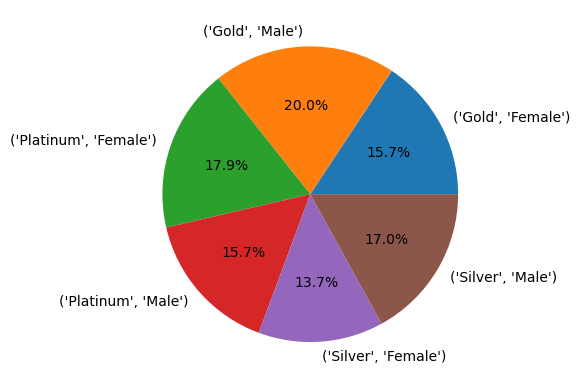

In [276]:
plt.pie(x,labels=x.index,autopct='%2.1f%%')
plt.show()

In [287]:
final_data.gender.fillna(final_data.gender.mode()[0],inplace=True)

In [296]:
y=final_data[final_data.incident_cause.str.upper().str.contains('DRIVER')].groupby(by='gender').total_policy_claims.count()

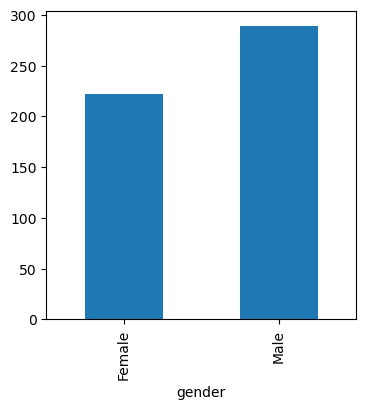

In [299]:
y.plot(kind='bar',figsize=(4,4))
plt.show()

In [308]:
z=final_data[final_data.fraudulent=='Yes'].groupby(by='Age_category').total_policy_claims.count()
z

Age_category
children      7
youth        69
adult       111
senior        0
Name: total_policy_claims, dtype: int64

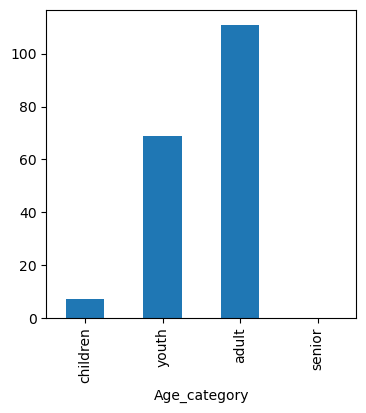

In [309]:
z.plot(kind='bar',figsize=(4,4))
plt.show()

In [318]:
final_data['claim_month']=final_data['claim_date'].dt.strftime('%b')

In [319]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Age,Age_category,flag,claim_month
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,38.0,adult,1.0,Nov
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,48.0,adult,NaN,Oct


In [344]:
import calendar

In [365]:
months=list(['Jan','Feb','Mar','April','May','June','July','Aug','sep','oct','Nov','Dec'])
Monthly_trend=pd.DataFrame(final_data.groupby(by='claim_month').claim_amount.sum()).set_index([months])
Monthly_trend

,claim_amount
Jan,1.293835e+06
Feb,9.134069e+05
Mar,7.256831e+05
April,1.193379e+06
May,1.331813e+06
June,1.382470e+06
July,1.320222e+06
Aug,1.348302e+06
sep,1.115015e+06
oct,6.259183e+05


In [326]:
import seaborn as sns

Text(0.5, 1.0, 'Monthly trend of Claim Amount by Customers')

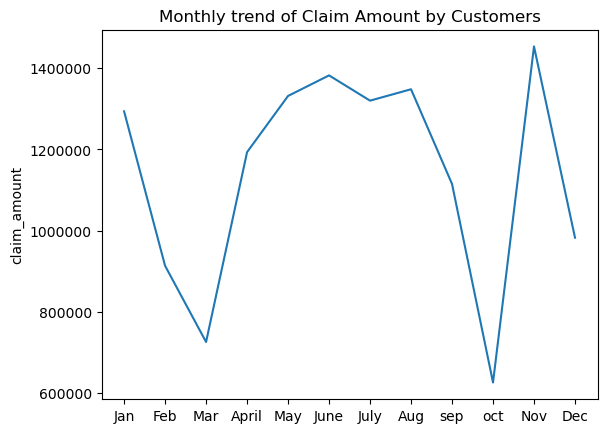

In [366]:
sns.lineplot(x=Monthly_trend.index,y='claim_amount',data=Monthly_trend)
plt.ticklabel_format(style = 'plain',axis='y')
plt.title('Monthly trend of Claim Amount by Customers')

In [375]:
Grouped_data=final_data.groupby(['Age_category','gender','fraudulent']).claim_amount.mean().round(2).reset_index()

In [376]:
Grouped_data

,Age_category,gender,fraudulent,claim_amount
0,children,Female,No,11435.00
1,children,Female,Yes,2915.25
2,children,Male,No,13699.38
3,children,Male,Yes,8045.40
4,youth,Female,No,12275.47
5,youth,Female,Yes,8326.20
6,youth,Male,No,12353.15
7,youth,Male,Yes,11080.69
8,adult,Female,No,12530.35
9,adult,Female,Yes,16299.76


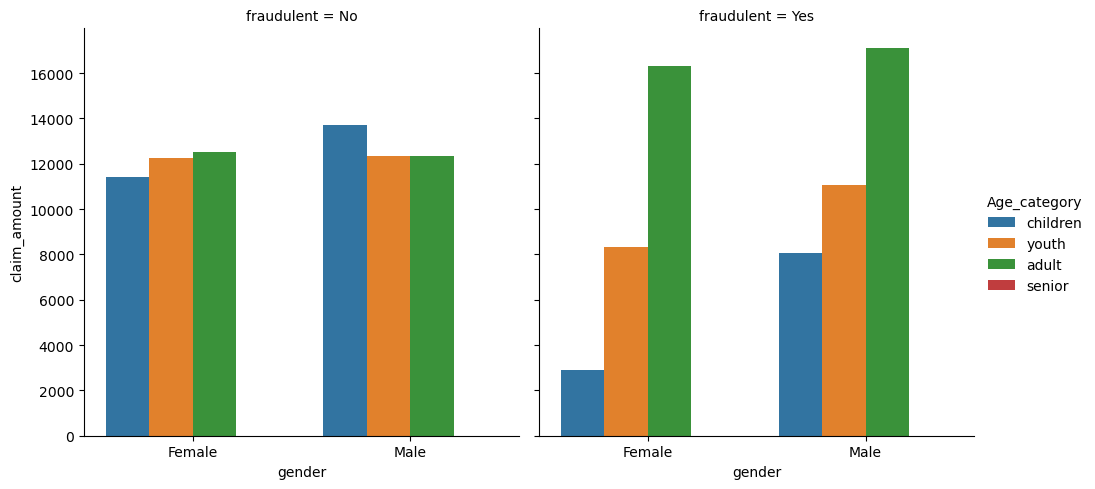

In [389]:
Plot=sns.catplot(x='gender',y='claim_amount',col='fraudulent',data=Grouped_data,hue='Age_category',kind='bar')

In [406]:
claim_gender=final_data.groupby('gender').claim_amount.mean().round(2)
claim_gender

gender
Female    12064.80
Male      12793.77
Name: claim_amount, dtype: float64

In [82]:
female_claim=final_data.loc[final_data.gender=='Female','claim_amount']


In [83]:
Male_claim=final_data.loc[final_data.gender=='Male','claim_amount']


In [12]:
from scipy import stats

Ho= mean of amount claimed by females and males are equal 
Ha= mean of amount claimed by females and males are not equal 
At CI= 95% , p value = 0.05 
Test = T test 

In [84]:
stats.ttest_ind(Male_claim,female_claim)

Ttest_indResult(statistic=0.973609831598026, pvalue=0.3304663127330706)

Business Conclusion 

pvalue 0.3304663127330706 > 0.05 , so here we cannot reject Ho

we concude that the means are much likely to be similar

#### since we have to check relationship between two categorical variables,e.g segment and age_category so we will do chi-squared test

Ho= There is no significant relationship between segment selection and their age_category
Ha= Segment and age_category variables are related to each other
At 95% CI ,P-Value=0.05

In [27]:
Table=pd.crosstab(index=final_data.Age_category, columns=final_data.Segment)  #### observed frequency table
Table

Segment,Gold,Platinum,Silver
Age_category,,,
children,12,9,12
youth,109,116,102
adult,173,154,153


In [30]:
stats.chi2_contingency(Table)

(1.7191469720752537,
 0.7872366844175828,
 4,
 array([[ 11.55      ,  10.96071429,  10.48928571],
        [114.45      , 108.61071429, 103.93928571],
        [168.        , 159.42857143, 152.57142857]]))

Rejection rules 

Since 0.78 > 0.05 , so we cannot reject Ho
There are high chances that there is no significant relationship between segment selection and their age_category

In [ ]:
Sample = $ 10000
#### since we have to compare means of two continuous variable so we will do t-test

Ho= There is no significant rise in claim amount as per 2016-17 year | claim_amount_present_year = 10000
Ha= There is significant rise in claim amount as per 2016-17 year | claim_amount_present_year=!10000
At 95% CI ,P-Value=0.05


In [29]:
stats.ttest_1samp(final_data.claim_amount,10000)

Ttest_1sampResult(statistic=6.104342377119082, pvalue=1.4263351633589836e-09)

Business conclusion

pvalue comparison 1.4263351633589836e-09 < 0.05, we reject Ho

There is significant rise in claim amount as per 2016-17 year or the claim_Amount for the present year is not equals to 10000


In [72]:
final_data.Age_category.value_counts()

adult       480
youth       327
children     33
senior        0
Name: Age_category, dtype: int64

In [73]:
X=final_data.loc[final_data.Age_category=='adult','claim_amount']


In [74]:
Y=final_data.loc[final_data.Age_category=='youth','claim_amount']


In [75]:
Z=final_data.loc[final_data.Age_category=='children','claim_amount']

Ho=mean of all three Age_category are equal 
Ha=mean of all three Age_category are  not equal 

At CI=95%, pvalue=0.05
Testing to be done F/Anova Test

In [76]:
stats.f_oneway(X,Y,Z)

F_onewayResult(statistic=1.675508169978193, pvalue=0.18784031602301193)

since 0.187 > 0.05 ,we cannot reject Ho

Business Conclusion -

The mean of claimed amount by different age categories are approximately same.

In [80]:
final_data.total_policy_claims.nunique()

8

Ho= There is no relationship between total numbers of policy claimed & claimed amount
Ha= Total numbers of policy claimed & claimed amount are related to each other
At CI=95%,p-value=0.05
Test = since we have one categorical and one continuous variable so we will go with spearmen rank test

In [81]:
stats.spearmanr(final_data.total_policy_claims,final_data.claim_amount)

SpearmanrResult(correlation=0.0026365065886759043, pvalue=0.9301772224005503)

Business Conclusion 

since pvalue , 0.90177 > 0.05 so here we cannot reject Ho
There is no relationship between number of poilcy claimed and their amount.